<a href="https://colab.research.google.com/github/KassieJ14/Course-Projects/blob/main/Gear%20Optimisation%20System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Reading the necessary csv files.

#Files pertaining to characters and their stats:
ncp = pd.read_csv('/content/drive/MyDrive/Subjects/Optimisation/optimisation proj/na_ca_pa.csv')
cb_stats = pd.read_csv('/content/drive/MyDrive/Subjects/Optimisation/optimisation proj/Characters Base Stats.csv')
e_skills = pd.read_csv('/content/drive/MyDrive/Subjects/Optimisation/optimisation proj/elemental_skills.csv')
e_bursts = pd.read_csv('/content/drive/MyDrive/Subjects/Optimisation/optimisation proj/elemental_bursts.csv')

#Files concerning artifacts:
artifact_mains = pd.read_csv('/content/drive/MyDrive/Subjects/Optimisation/optimisation proj/Artifact_Main_Stats.csv')
artifact_subs = pd.read_csv('/content/drive/MyDrive/Subjects/Optimisation/optimisation proj/artifact_sub_stats.csv')
artifact_sets = pd.read_csv('/content/drive/MyDrive/Subjects/Optimisation/optimisation proj/artifact sets.csv')

#Files concerning weapons:
weapon_stats = pd.read_csv('/content/drive/MyDrive/Subjects/Optimisation/optimisation proj/weapons_file.csv')

In [ ]:
#Observing ncp:
ncp

,Character Name,Vision,DMG Type,Skill Name,String,Talent Level 9,Stat Scaling,Class
0,Albedo,Geo,Physical DMG,Normal Attack,1-Hit DMG,67.50%,ATK,Normal Attacks
1,Albedo,Geo,Physical DMG,Normal Attack,2-Hit DMG,67.50%,ATK,Normal Attacks
2,Albedo,Geo,Physical DMG,Normal Attack,3-Hit DMG,87.18%,ATK,Normal Attacks
3,Albedo,Geo,Physical DMG,Normal Attack,4-Hit DMG,91.40%,ATK,Normal Attacks
4,Albedo,Geo,Physical DMG,Normal Attack,5-Hit DMG,114.04%,ATK,Normal Attacks
...,...,...,...,...,...,...,...,...
774,Zhongli,Geo,Physical DMG,Normal Attack,5-Hit DMG,19.75%,ATK,Normal Attacks
775,Zhongli,Geo,Physical DMG,Normal Attack,5-Hit DMG,19.75%,ATK,Normal Attacks
776,Zhongli,Geo,Physical DMG,Normal Attack,6-Hit DMG,100.12%,ATK,Normal Attacks
777,Zhongli,Geo,Physical DMG,CA,Charged Attack,203.98%,ATK,Normal Attacks


In [ ]:
#Observing cb_stats
cb_stats

,Character Name,Vision,Nation,Weapon,Rarity,Availability,Ascension Stat,Ascension Stat Value,Base HP,Base ATK,...,Dendro DMG Bonus,Dendro RES,Electro DMG Bonus,Electro RES,Anemo DMG Bonus,Anemo RES,Cryo DMG Bonus,Cryo RES,Physical DMG Bonus,Physical RES
0,Albedo,Geo,Mondstadt,Sword,5,Limited,Geo DMG Bonus,28.8,13226,251.00,...,0.0,15,0,15,0.0,15,0.0,15,0,10
1,Alhaitham,Dendro,Sumeru,Sword,5,Limited,Dendro DMG Bonus,28.8,13348,313.00,...,28.8,15,0,15,0.0,15,0.0,15,0,10
2,Aloy,Cryo,Outlander,Bow,5,Free,Cryo DMG Bonus,28.8,"10,898.86",233.92,...,0.0,0,0,0,NaN,0,28.8,15,0,10
3,Amber,Pyro,Mondstadt,Bow,4,Free,ATK,24.0,9461,223.00,...,0.0,15,0,15,0.0,15,0.0,15,0,10
4,Arataki Itto,Geo,Inazuma,Claymore,5,Limited,CRIT Rate,19.2,12858,227.00,...,0.0,15,0,15,0.0,15,0.0,15,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Yaoyao,Dendro,Liyue,Polearm,4,Limited,HP,24.0,12288,212.00,...,0.0,15,0,15,0.0,15,0.0,15,0,10
80,Yelan,Hydro,Liyue,Bow,5,Limited,CRIT Rate,19.2,14450,244.00,...,0.0,15,0,15,0.0,15,0.0,15,0,10
81,Yoimiya,Pyro,Inazuma,Bow,5,Limited,CRIT Rate,19.2,10164,323.00,...,0.0,15,0,15,0.0,15,0.0,15,0,10
82,Yun Jin,Geo,Liyue,Polearm,4,Limited,Energy Recharge,26.8,10657,191.00,...,0.0,15,0,15,0.0,15,0.0,15,0,10


In [ ]:
#Observing e_skills
e_skills

,Character Name,Vision,DMG Type,Skill Name,String,Talent Level 9,Stat Scaling,Class
0,Albedo,Geo,Geo DMG,Abiogenesis: Solar Isotoma,Solar Isotoma,221.68%,ATK,Elemental Skill
1,Albedo,Geo,Geo DMG,Abiogenesis: Solar Isotoma,Transient Blossom,227.12%,DEF,Elemental Skill
2,Alhaitham,Dendro,Dendro DMG,Universality: An Elaboration on Form,Rush Attack,329.12%,ATK,Elemental Skill
3,Alhaitham,Dendro,Dendro DMG,Universality: An Elaboration on Form,Rush Attack,263.30%,Elemental Mastery,Elemental Skill
4,Alhaitham,Dendro,Dendro DMG,Universality: An Elaboration on Form,Mirror Projection Attack,114.24%,ATK,Elemental Skill
...,...,...,...,...,...,...,...,...
203,Yun Jin,Geo,Geo DMG,Opening Flourish,Skill,633.76%,DEF,Elemental Skill
204,Yun Jin,Geo,Shield,Opening Flourish,Shield,20.40%,HP,Elemental Skill
205,Zhongli,Geo,Geo DMG,Dominus Lapidis,Stone Stele,136.00%,ATK,Elemental Skill
206,Zhongli,Geo,Geo DMG,Dominus Lapidis,Resonance DMG,54.40%,ATK,Elemental Skill


In [ ]:
#Observing e_bursts
e_bursts

,Character Name,Vision,DMG Type,Skill Name,String,Talent Level 9,Stat Scaling,Class
0,Albedo,Geo,Geo DMG,Rite of Progeniture: Tectonic Tide,Burst Cast,624.24%,ATK,Elemental Burst
1,Albedo,Geo,Geo DMG,Rite of Progeniture: Tectonic Tide,Fatal Blossom,122.40%,ATK,Elemental Burst
2,Alhaitham,Dendro,Dendro DMG,Particular Field: Fetters of Phenomena,Burst,206.72%,ATK,Elemental Burst
3,Alhaitham,Dendro,Dendro DMG,Particular Field: Fetters of Phenomena,Burst,165.38%,Elemental Mastery,Elemental Burst
4,Aloy,Cryo,Cryo DMG,Prophecies of Dawn,Burst,610.64%,ATK,Elemental Burst
...,...,...,...,...,...,...,...,...
186,Yoimiya,Pyro,Pyro DMG,Ryuukin Saxifrage,Skill DMG (T9%),216.24%,ATK,Elemental Burst
187,Yoimiya,Pyro,Pyro DMG,Ryuukin Saxifrage,Skill DMG (T9%),207.40%,ATK,Elemental Burst
188,Yun Jin,Geo,Geo DMG,Cliffbreaker's Banner,Skill DMG (T9%),414.80%,ATK,Elemental Burst
189,Yun Jin,Geo,DMG Increase,Cliffbreaker's Banner,Damage Increase (T9%),54.67%,DEF,Elemental Burst


In [ ]:
#Initial Test:

#Obtaining the characters initial information:
char = 'Neuvillette'

char_base_stats = cb_stats.loc[cb_stats['Character Name']==f'{char}']
char_na = ncp.loc[ncp['Character Name']==f'{char}']
char_es = e_skills.loc[e_skills['Character Name']==f'{char}']
char_eb = e_bursts.loc[e_bursts['Character Name']==f'{char}']

#Compiling all attack patterns into a single dataframe:
char_info = pd.concat([char_na,char_es,char_eb],ignore_index = True)

In [ ]:
def sub_stat_generator(artifact_mains,artifact_subs):
  sub_stats = random.sample(list(artifact_subs['Substat']),k=4)
  sub_stat_cols = []
  sub_stat_vals = []

  upgraded_stats = []
  levels = artifact_subs.columns[1::]
  #Creating a temporary data-frame to hold sub-stat data:
  temp_stat = artifact_subs
  n = 0
  #Randomly upgrading the sub-stats:
  for it in range(5):
    upgrade = random.choices(sub_stats)
    upgraded_stats += upgrade

  #Creating the artifact data-frame:
  for s in sub_stats:
    temp_stat = artifact_subs.loc[artifact_subs['Substat']==f'{s}']
    sub_stat_cols += [s]

    if s in upgraded_stats:
      temp_stat = list(temp_stat[f'{levels[upgraded_stats.count(s)]}'])
      sub_stat_vals += [temp_stat[0]]
    else:
      temp_stat = list(temp_stat['L0'])
      sub_stat_vals += [temp_stat[0]]
    n+=1
  artifact_sub_stats = pd.DataFrame(dict(zip(sub_stat_cols,sub_stat_vals)),index = range(len(sub_stat_cols)))
  return artifact_sub_stats

In [ ]:
def stat_compiler(char_info):
  char_dmg_type = list(char_info['DMG Type'])
  char_talent_level = [float(a.replace('%','')) for a in list(char_info['Talent Level 9'])]
  char_stat_scaling = list(char_info['Stat Scaling'])

  return list(np.unique(char_dmg_type)),list(np.unique(char_stat_scaling))

In [ ]:
def Flower_Of_Life(artifact_mains,artifact_subs):
  flower_of_life = artifact_mains.loc[artifact_mains['Artifact Type']=='Flower Of Life']

  Base_HP = flower_of_life['Value'][0].replace(',','')
  Base_HP = int(Base_HP)

  sub_stats = sub_stat_generator(artifact_mains,artifact_subs)

  return Base_HP, sub_stats

In [ ]:
def Plume_Of_Death(artifact_mains,artifact_subs):
  plume_of_death = artifact_mains.loc[artifact_mains['Artifact Type']=='Plume Of Death']

  Flat_Feather_ATK = list(plume_of_death['Value'])
  Flat_Feather_ATK = int(Flat_Feather_ATK[0])

  sub_stats = sub_stat_generator(artifact_mains,artifact_subs)

  return Flat_Feather_ATK, sub_stats

In [ ]:
def Sands_of_Eon(artifact_mains,artifact_subs,char_info):
  sands_of_eon = artifact_mains.loc[artifact_mains['Artifact Type']=='Sands of Eon']

  #Obtaining the characters viable stats from their kit:
  main_affixes = list()
  main_dmg_types,main_stat_scaling = stat_compiler(char_info)

  affixes = main_dmg_types + main_stat_scaling
  main_affixes = list(sands_of_eon['Affix'])

  sand_affixes = []
  sand_affix_values = []

  for af in affixes:
    for s in main_affixes:
      if af in s:
        sand_affixes += [s]

  for stat in sand_affixes:
    temp_df = sands_of_eon.loc[sands_of_eon['Affix']==f'{stat}']
    sand_affix_values += [list(temp_df['Value'])[0]]

  #Finding sub-stats:
  sub_stats = sub_stat_generator(artifact_mains,artifact_subs)
  return sand_affixes, sand_affix_values, sub_stats

In [ ]:
def Goblet_of_Eonothem(artifact_mains,artifact_subs,char_info):
  goblet_of_eonothem = artifact_mains.loc[artifact_mains['Artifact Type']=='Goblet of Eonothem']

  #Obtaining the characters viable stats from their kit:
  main_affixes = list()
  main_dmg_types,main_stat_scaling = stat_compiler(char_info)

  affixes = main_dmg_types + main_stat_scaling
  main_affixes = list(goblet_of_eonothem['Affix'])

  goblet_affixes = []
  goblet_affix_values = []

  for af in affixes:
    for s in main_affixes:
      if af in s:
        goblet_affixes += [s]

  for stat in goblet_affixes:
    temp_df = goblet_of_eonothem.loc[goblet_of_eonothem['Affix']==f'{stat}']
    goblet_affix_values += [list(temp_df['Value'])[0]]

  #Finding sub-stats:
  sub_stats = sub_stat_generator(artifact_mains,artifact_subs)
  return goblet_affixes, goblet_affix_values,sub_stats

In [ ]:
def Circlet_of_Logos(artifact_mains,artifact_subs,char_info):
  circlet_of_logos = artifact_mains.loc[artifact_mains['Artifact Type']=='Circlet of Logos']

  #Obtaining the characters viable stats from their kit:
  main_affixes = list()
  main_dmg_types,main_stat_scaling = stat_compiler(char_info)

  affixes = main_dmg_types + main_stat_scaling
  main_affixes = list(circlet_of_logos['Affix'])

  circlet_affixes = ['Crit DMG','Crit RATE']
  circlet_affix_values = []

  for af in affixes:
    for s in main_affixes:
      if af in s:
        circlet_affixes += [s]

  for stat in circlet_affixes:
    temp_df = circlet_of_logos.loc[circlet_of_logos['Affix']==f'{stat}']
    circlet_affix_values += [list(temp_df['Value'])[0]]

  #Finding sub-stats:
  sub_stats = sub_stat_generator(artifact_mains,artifact_subs)
  return circlet_affixes, circlet_affix_values, sub_stats

In [ ]:
#Generating the characters build:
hp, flower_ss = Flower_Of_Life(artifact_mains,artifact_subs)
atk, feather_ss = Plume_Of_Death(artifact_mains,artifact_subs)
sand_affixes, sand_affix_values, sand_ss = Sands_of_Eon(artifact_mains,artifact_subs,char_info)
goblet_affixes, goblet_affix_values,goblet_ss = Goblet_of_Eonothem(artifact_mains,artifact_subs,char_info)
circlet_affixes, circlet_affix_values, circlet_ss = Circlet_of_Logos(artifact_mains,artifact_subs,char_info)

In [ ]:
def max_artifact_mains(hp,atk,sand_affixes,sand_affix_values,goblet_affixes
                       ,goblet_affix_values,circlet_affixes,circlet_affix_values,
                       char_base_stats,char_na,char_es,char_eb,char_info):

  sand_affix_values = [float(a.replace('%','')) for a in sand_affix_values]
  goblet_affix_values = [float(a.replace('%','')) for a in goblet_affix_values]
  circlet_affix_values = [float(a.replace('%','')) for a in circlet_affix_values]

  Elemental_DMG = ['Hydro DMG','Electro DMG','Anemo DMG','Dendro DMG','Pyro DMG','Cryo DMG','Geo DMG']

  Char_Talents = list(char_info['Talent Level 9'])
  Char_Talents = [float(a.replace('%','')) for a in Char_Talents]
  Char_Scaling = list(char_info['Stat Scaling'])
  Char_DMG_Type = list(char_info['DMG Type'])

  Elemental_Mastery = float(list(char_base_stats['Elemental Mastery'])[0])
  Energy_Recharge = float(list(char_base_stats['Energy Recharge'])[0])
  CritDMG = float(list(char_base_stats['CRIT DMG'])[0])
  CritRATE = float(list(char_base_stats['CRIT Rate'])[0])

  ATKBonus = int()
  DEFBonus = int()
  HealthBonus = int()

  Elemental_DMG_Bonus = int()
  Physical_DMG_Bonus = int()

  DMG = int()
  stat_combination = []
  stat_combo_dmg = []

  for i in range(len(sand_affixes)):
    if sand_affixes[i] == 'HP%':
      HealthBonus += sand_affix_values[i]
    if sand_affixes[i] == 'ATK%':
      ATKBonus += sand_affix_values[i]
    if sand_affixes[i] == 'DEF%':
      DEFBonus += sand_affix_values[i]
    if sand_affixes[i] == 'Elemental Mastery':
      Elemental_Mastery += sand_affix_values[i]
    if sand_affixes[i] == 'Energy Recharge':
      Energy_Recharge += sand_affix_values[i]

    for j in range(len(goblet_affixes)):
      if goblet_affixes[j] == 'HP%':
        HealthBonus += goblet_affix_values[j]
      if goblet_affixes[j] == 'ATK%':
        ATKBonus += goblet_affix_values[j]
      if goblet_affixes[j] == 'DEF%':
        DEFBonus += goblet_affix_values[j]
      if goblet_affixes[j] == 'Elemental Mastery':
        Elemental_Mastery += goblet_affix_values[j]
      if goblet_affixes[j] == 'Physical DMG Bonus':
        Physical_DMG_Bonus += goblet_affix_values[j]
      if goblet_affixes[j] == 'Pyro DMG Bonus' or 'Hydro DMG Bonus' or 'Cryo DMG Bonus' or 'Geo DMG Bonus' or 'Dendro DMG Bonus' or 'Electro DMG Bonus' or 'Anemo DMG Bonus':
        Elemental_DMG_Bonus += goblet_affix_values[j]

      for k in range(len(circlet_affixes)):
        if circlet_affixes[k] == 'HP%':
          HealthBonus += circlet_affix_values[k]
        if circlet_affixes[k] == 'ATK%':
          ATKBonus += circlet_affix_values[k]
        if circlet_affixes[k] == 'DEF%':
          DEFBonus += circlet_affix_values[k]
        if circlet_affixes[k] == 'Elemental Mastery':
          Elemental_Mastery += circlet_affix_values[k]
        if circlet_affixes[k] == 'Crit DMG':
          CritDMG += circlet_affix_values[k]
        if circlet_affixes[k] == 'Crit RATE':
          CritRATE += circlet_affix_values[k]

        #Obtaining the ATK, DEF and MaxHP Values:
        ATK = (float(list(char_base_stats['Base ATK'])[0]) + 185) * (1 + ATKBonus) + atk
        DEF = (float(list(char_base_stats['Base DEF'])[0])) * (1 + DEFBonus)
        MaxHP = (float(list(char_base_stats['Base HP'])[0])) * (1 + HealthBonus) + hp

        #Calculating the CRIT DMG:
        CRIT = 1 + CritDMG

        #Calculating the DMG:
        BaseDMG = int()
        for l in range(len(Char_Talents)):
          if Char_Scaling[l] == 'ATK':
            BaseDMG += (Char_Talents[l]) * (ATK)
          if Char_Scaling[l] == 'DEF':
            BaseDMG += (Char_Talents[l]) * (DEF)
          if Char_Scaling[l] == 'HP':
            BaseDMG += (Char_Talents[l]) * (MaxHP)
          if Char_Scaling[l] == 'Elemental Mastery':
            BaseDMG += (Char_Talents[l]) * Elemental_Mastery
          if Char_Scaling[l] == 'Base ATK':
            BaseDMG += (Char_Talents[l]) * (float(list(char_base_stats['Base ATK'])[0]) + 185)

        for dmg_type in Char_DMG_Type:
          if dmg_type in Elemental_DMG:
            DMG = ((BaseDMG * 1) + 0) * (1 + Elemental_DMG_Bonus) * CRIT
          if dmg_type == 'Physical DMG':
            DMG = ((BaseDMG * 1) + 0) * (1 + Physical_DMG_Bonus) * CRIT


          #Resetting the stats for the loop:
          Elemental_Mastery = float(list(char_base_stats['Elemental Mastery'])[0])

          Energy_Recharge = float(list(char_base_stats['Energy Recharge'])[0])
          CritDMG = float(list(char_base_stats['CRIT DMG'])[0])
          CritRATE = float(list(char_base_stats['CRIT Rate'])[0])

          ATKBonus = int()
          DEFBonus = int()
          HealthBonus = int()

          Elemental_DMG_bonus = int()
          Physical_DMG_Bonus = int()

        stat_combo_dmg += [DMG]
        stat_combination += [[sand_affixes[i],goblet_affixes[j],circlet_affixes[k]]]

  max_dmg = max(stat_combo_dmg)
  max_dmg_pos = stat_combo_dmg.index(max_dmg)
  max_dmg_stats = stat_combination[max_dmg_pos]

  best_dmg_stats = dict(zip(stat_combo_dmg,stat_combination))
  ks = list(best_dmg_stats.keys())
  ks.sort()
  best_dmg_stats = {s:best_dmg_stats[s] for s in ks}
  return best_dmg_stats

main_art = max_artifact_mains(hp,atk,sand_affixes,sand_affix_values,goblet_affixes
                       ,goblet_affix_values,circlet_affixes,circlet_affix_values,
                       char_base_stats,char_na,char_es,char_eb,char_info)

In [ ]:
print (main_art)

{28473540955.552: ['ATK%', 'Hydro DMG Bonus', 'Crit RATE'], 56348898277.58401: ['ATK%', 'ATK%', 'Crit RATE'], 84224255599.616: ['ATK%', 'HP%', 'Crit RATE'], 109491005674.25441: ['ATK%', 'Hydro DMG Bonus', 'ATK%'], 112099612921.648: ['HP%', 'Hydro DMG Bonus', 'Crit RATE'], 139974970243.68: ['HP%', 'ATK%', 'Crit RATE'], 158345672481.56165: ['ATK%', 'Hydro DMG Bonus', 'Crit DMG'], 167850327565.712: ['HP%', 'HP%', 'Crit RATE'], 216681780136.8648: ['ATK%', 'ATK%', 'ATK%'], 313364755205.10724: ['ATK%', 'ATK%', 'Crit DMG'], 323872554599.4752: ['ATK%', 'HP%', 'ATK%'], 431063329062.08563: ['HP%', 'Hydro DMG Bonus', 'ATK%'], 538254103524.69604: ['HP%', 'ATK%', 'ATK%'], 645444877987.3065: ['HP%', 'HP%', 'ATK%'], 778422003375.7441: ['HP%', 'ATK%', 'Crit DMG'], 920161226138.7393: ['ATK%', 'Hydro DMG Bonus', 'HP%'], 1820991334081.2866: ['ATK%', 'ATK%', 'HP%'], 2721821442023.834: ['ATK%', 'HP%', 'HP%'], 3622651549966.381: ['HP%', 'Hydro DMG Bonus', 'HP%'], 3936292702381.6714: ['ATK%', 'HP%', 'Crit DM

In [ ]:
def max_weapon_dmg(hp,atk,artifact_mains,weapon_stats,
                       char_base_stats,char_na,char_es,char_eb,char_info):

  weapon_type = list(char_base_stats['Weapon'])[0]
  viable_weapons = weapon_stats.loc[weapon_stats['Weapon']==f'{weapon_type}']
  weapon_names = list(viable_weapons['Weapon Name'])

  Elemental_Mastery = float(list(char_base_stats['Elemental Mastery'])[0])
  Energy_Recharge = float(list(char_base_stats['Energy Recharge'])[0])
  CritDMG = float(list(char_base_stats['CRIT DMG'])[0])
  CritRATE = float(list(char_base_stats['CRIT Rate'])[0])

  ATKBonus = int()
  DEFBonus = int()
  HealthBonus = int()
  CRIT = int()

  Elemental_DMG_Bonus = int()
  Physical_DMG_Bonus = int()

  max_dmg_names = []

  Elemental_DMG = ['Hydro DMG','Electro DMG','Anemo DMG','Dendro DMG','Pyro DMG','Cryo DMG','Geo DMG']

  Char_Talents = list(char_info['Talent Level 9'])
  Char_Talents = [float(a.replace('%','')) for a in Char_Talents]
  Char_Scaling = list(char_info['Stat Scaling'])
  Char_DMG_Type = list(char_info['DMG Type'])

  DMG = int()
  weapon_dmg = []
  weapon_dmg_names = []

  for weapon in weapon_names:
    weapon_df = viable_weapons.loc[viable_weapons['Weapon Name']==f'{weapon}']
    weapon_base_atk = list(weapon_df['Base ATK'])[0]

    weapon_main_stat = list(weapon_df['Stat'])[0]
    weapon_main_stat_value = list(weapon_df['Stat Value'])[0]

    if weapon_main_stat == 'ATK%' or 'ATK':
      ATKBonus += float(weapon_main_stat_value.replace('%',''))
    if weapon_main_stat  == 'DEF%':
      DEFBonus += float(weapon_main_stat_value.replace('%',''))
    if weapon_main_stat == 'HP':
      HealthBonus += float(weapon_main_stat_value.replace('%',''))
    if weapon_main_stat  == 'Energy Recharge':
      Energy_Recharge += float(weapon_main_stat_value.replace('%',''))
    if weapon_main_stat == 'Elemental Mastery':
      Elemental_Mastery += float(weapon_main_stat_value)
    if weapon_main_stat == 'Crit DMG':
      CritDMG += float(weapon_main_stat_value.replace('%',''))
    if weapon_main_stat == 'Crit RATE':
      CritRATE += float(weapon_main_stat_value.replace('%',''))
    if weapon_main_stat == 'Physical DMG':
      Physical_DMG_Bonus += float(weapon_main_stat_value.replace('%',''))

    #Obtaining the ATK, DEF and MaxHP Values:
    ATK = (float(list(char_base_stats['Base ATK'])[0]) + weapon_base_atk) * (1 + ATKBonus/100) + atk
    DEF = (float(list(char_base_stats['Base DEF'])[0])) * (1 + DEFBonus/100)
    MaxHP = (float(list(char_base_stats['Base HP'])[0])) * (1 + HealthBonus/100) + hp

    #Calculating the CRIT DMG:
    CRIT = 1 + CritDMG

    #Calculating the DMG:
    BaseDMG = int()
    for l in range(len(Char_Talents)):
      if Char_Scaling[l] == 'ATK':
        BaseDMG += ((Char_Talents[l]/100) * (ATK))
      if Char_Scaling[l] == 'DEF':
        BaseDMG += ((Char_Talents[l]/100) * (DEF))
      if Char_Scaling[l] == 'HP':
        BaseDMG += ((Char_Talents[l]/100) * (MaxHP))
      if Char_Scaling[l] == 'Elemental Mastery':
        BaseDMG += ((Char_Talents[l]/100) * (Elemental_Mastery))
      if Char_Scaling[l] == 'Base ATK':
        BaseDMG += ((Char_Talents[l]/100) * (float(list(char_base_stats['Base ATK'])[0]) + weapon_base_atk))

    for dmg_type in Char_DMG_Type:
      if dmg_type in Elemental_DMG:
        DMG = ((BaseDMG * 1) + 0) * (1 + Elemental_DMG_Bonus/100 - 0) * CRIT
      if dmg_type == 'Physical DMG':
        DMG = ((BaseDMG * 1) + 0) * (1 + Physical_DMG_Bonus/100 - 0) * CRIT
    weapon_dmg += [DMG]


    Elemental_Mastery = float(list(char_base_stats['Elemental Mastery'])[0])
    Energy_Recharge = float(list(char_base_stats['Energy Recharge'])[0])
    CritDMG = float(list(char_base_stats['CRIT DMG'])[0])
    CritRATE = float(list(char_base_stats['CRIT Rate'])[0])

    ATKBonus = int()
    DEFBonus = int()
    HealthBonus = int()
    CRIT = int()

    Elemental_DMG_Bonus = int()
    Physical_DMG_Bonus = int()

  best_dmg_weapons = dict(zip(weapon_dmg,weapon_names))
  ks = list(best_dmg_weapons.keys())
  ks.sort()
  best_dmg_weapons = {w:best_dmg_weapons[w] for w in ks}

  return  best_dmg_weapons

weapons_ = max_weapon_dmg(hp,atk,artifact_mains,weapon_stats,char_base_stats,char_na,char_es,char_eb,char_info)

In [ ]:
print (weapons_)

{6327818.4121056: 'Twin Nephrite', 6333355.656954001: "Crane's Echoing Call", 6355776.015249202: 'Hakushin Ring', 6367809.6248996: 'Cashflow Supervision', 6401648.343417602: 'Royal Grimoire', 6416337.1911566015: 'Frostbearer', 6420105.8262456: 'Wine and Song', 6442372.836873801: 'Fruit of Fulfillment', 6458251.2907568: 'Sacrificial Jade', 6468058.106406402: 'Solar Pearl', 6471786.778164001: 'Otherworldly Story', 6514238.9886684: 'Favonius Codex', 6570841.936007601: 'Eye of Perception', 6608987.400518801: 'Waveriding Whirl', 6625985.757060802: 'Lost Prayer to the Sacred Winds', 6707628.054971602: 'Skyward Atlas', 6751117.4533328: 'Memory of Dust', 6805173.900020001: 'Mappa Mare', 6810173.963344001: 'Emerald Orb', 7247001.056940002: 'Wandering Evenstar', 7382355.931012001: 'Magic Guide', 7591540.736396001: 'Sacrificial Fragments', 7862250.484540001: "Starcaller's Watch", 7863427.249713601: 'Thrilling Tales of Dragon Slayers', 8146173.9901884: 'Ring of Yaxche', 8219713.955002801: 'Prototy

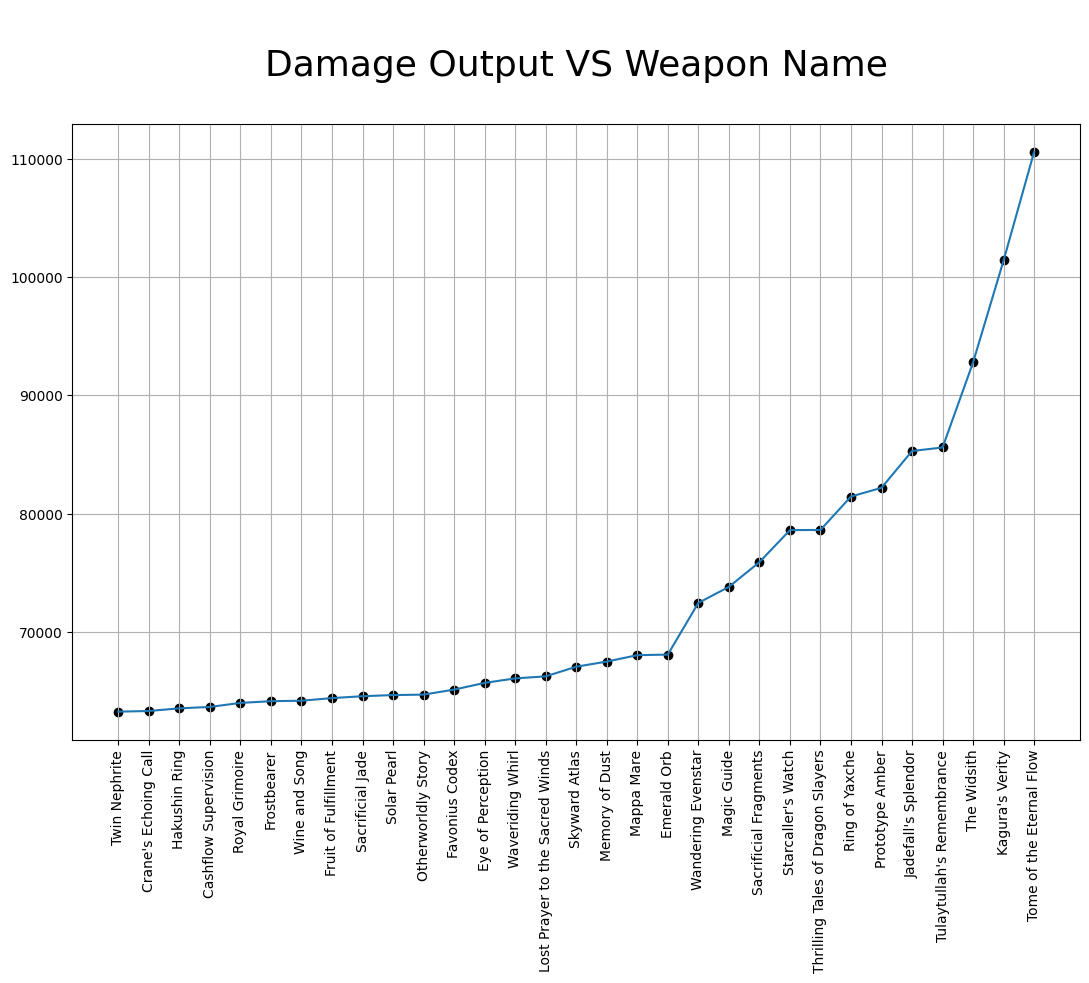

In [ ]:
#Plotting damage vs weapon:
x = [x for x in weapons_.values()]
y = [y/100 for y in weapons_.keys()]


plt.figure(figsize=(13,8))
plt.xticks(rotation = 90)
plt.title('\nDamage Output VS Weapon Name\n',fontsize=26)
plt.grid()
plt.scatter(x,y,color = 'black')
plt.plot(x,y)
plt.show()

In [ ]:
print (len(xs),len(ys))

32 24


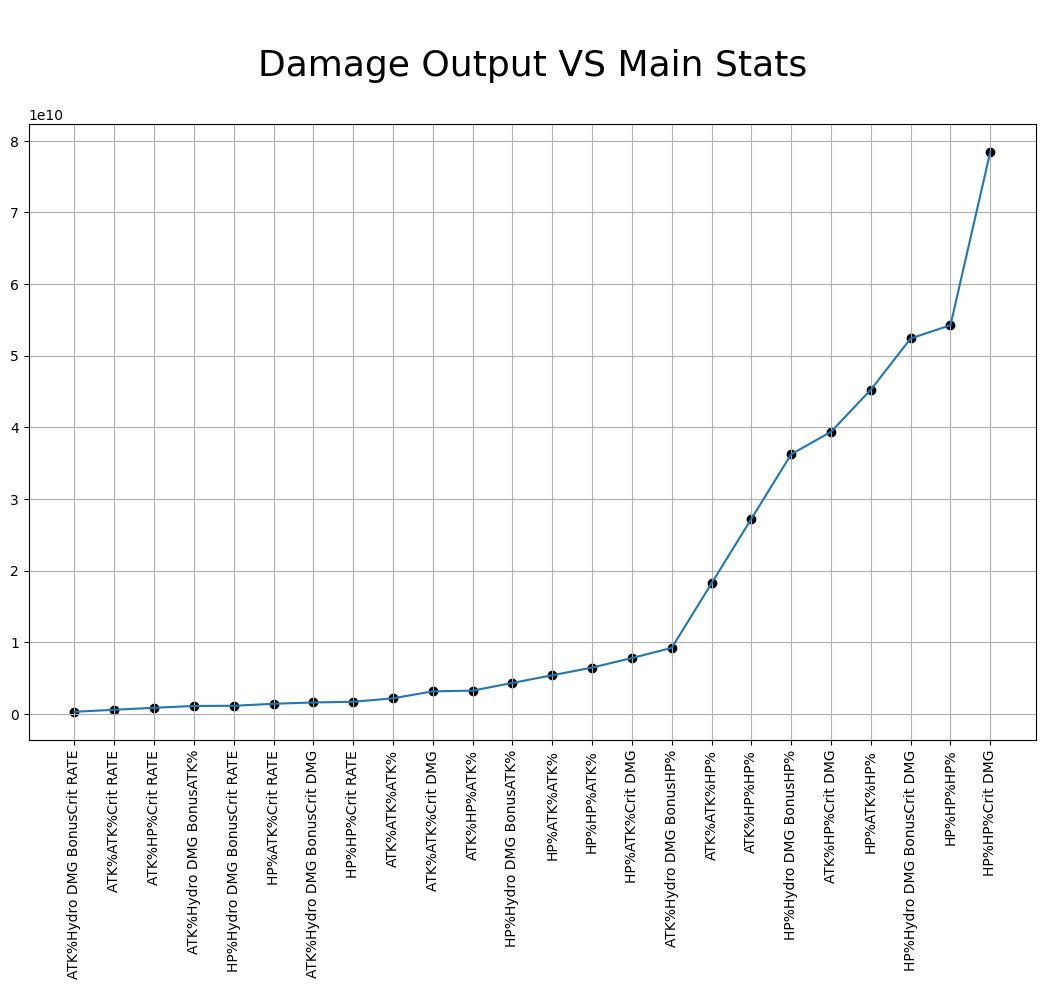

In [ ]:
#Plotting damage vs stat combo:
xs = []
stat_combs = list(main_art.values())
s = ''
for i in range(len(stat_combs)):
  for j in range(len(stat_combs[i])):
    s = ''.join(x for x in stat_combs[i])
  xs+= [s]

ys = [y/100 for y in main_art.keys()]

plt.figure(figsize=(13,8))
plt.xticks(rotation = 90)
plt.title('\nDamage Output VS Main Stats\n',fontsize=26)
plt.grid()
plt.scatter(xs,ys,color = 'black')
plt.plot(xs,ys)
plt.show()